# Homework 5, Part 2: Answer questions with pandas

**Use the Excel file to answer the following questions.** This is a little more typical of what your data exploration will look like with pandas.

## 0) Setup

Import pandas **with the correct name** .

In [77]:
import pandas as pd
import matplotlib

In [17]:
! pip install openpyxl
from openpyxl import Workbook

## 1) Reading in an Excel file

Use pandas to read in the `richpeople.xlsx` Excel file, saving it as a variable with the name we'll always use for a dataframe.

> **TIP:** You will use `read_excel` instead of `read_csv`, *but you'll also need to install a new library*. You might need to restart your kernel afterward!

In [20]:
df = pd.read_excel("richpeople.xlsx")

## 2) Checking your data

Display the number of rows and columns in your data. Also display the names and data types of each column.

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1653 entries, 0 to 1652
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   year                     1653 non-null   int64  
 1   name                     1653 non-null   object 
 2   rank                     1653 non-null   int64  
 3   citizenship              1653 non-null   object 
 4   countrycode              1653 non-null   object 
 5   networthusbillion        1653 non-null   float64
 6   selfmade                 1651 non-null   object 
 7   typeofwealth             1651 non-null   object 
 8   gender                   1653 non-null   object 
 9   age                      1590 non-null   float64
 10  industry                 1652 non-null   object 
 11  IndustryAggregates       1652 non-null   object 
 12  region                   1653 non-null   object 
 13  north                    1653 non-null   int64  
 14  politicalconnection     

## 3) Who are the top 10 richest billionaires? Use the `networthusbillion` column.

In [45]:
df.sort_values(by = 'networthusbillion', ascending = False).name.head(10)

184           Bill Gates
226     Carlos Slim Helu
79        Amancio Ortega
1562      Warren Buffett
862        Larry Ellison
339           David Koch
247         Charles Koch
1364     Sheldon Adelson
280       Christy Walton
724           Jim Walton
Name: name, dtype: object

## 4) How many male billionaires are there compared to the number of female billionares? What percent is that? Do they have a different average wealth?

> **TIP:** The last part uses `groupby`, but the count/percent part does not.
> **TIP:** When I say "average," you can pick what kind of average you use.

In [30]:
df.gender.value_counts()

male      1473
female     180
Name: gender, dtype: int64

In [46]:
male_percent = 1473/(1473+180)*100
male_percent

89.11070780399274

In [47]:
female_percent = 180/(1473+180)*100
female_percent

10.88929219600726

In [44]:
# I use "networthusbillion" to calculate the average wealth.
df.groupby(by = 'gender').networthusbillion.mean()

gender
female    3.920556
male      3.902716
Name: networthusbillion, dtype: float64

## 5) What is the most common source/type of wealth? Is it different between males and females?

> **TIP:** You know how to `groupby` and you know how to count how many times a value is in a column. Can you put them together???
> **TIP:** Use percentages for this, it makes it a lot more readable.

In [71]:
# It is different between males and females
df.groupby('gender').typeofwealth.value_counts(normalize = True)

gender  typeofwealth            
female  inherited                   0.788889
        founder non-finance         0.116667
        executive                   0.033333
        self-made finance           0.033333
        privatized and resources    0.027778
male    founder non-finance         0.303195
        inherited                   0.247451
        self-made finance           0.229776
        privatized and resources    0.127124
        executive                   0.092454
Name: typeofwealth, dtype: float64

## 6) What companies have the most billionaires? Graph the top 5 as a horizontal bar graph.

> **TIP:** First find the answer to the question, then just try to throw `.plot()` on the end
>
> **TIP:** You can use `.head()` on *anything*, not just your basic `df`
>
> **TIP:** You might feel like you should use `groupby`, but don't! There's an easier way to count.
>
> **TIP:** Make the largest bar be at the top of the graph
>
> **TIP:** If your chart seems... weird, think about where in the process you're sorting vs using `head`

In [76]:
# companies with most billionaries
df.company.value_counts(normalize = True).head(5)

Hyatt                  0.006687
Oetker-Gruppe          0.004863
S. C. Johnson & Son    0.004255
Cargill                0.003647
Alfa Group             0.003647
Name: company, dtype: float64

<AxesSubplot:>

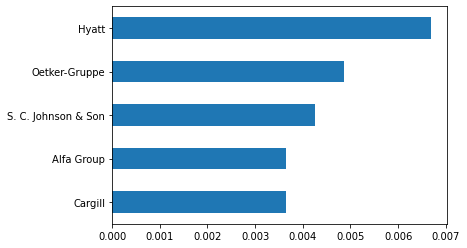

In [103]:
# bar graph
df.company.value_counts(normalize = True).head(5).sort_values().plot.barh()

## 7) How much money do these billionaires have in total?

In [105]:
df.networthusbillion.sum().round(2)

6454.4

## 8) What are the top 10 countries with the most money held by billionaires?

I am **not** asking which country has the most billionaires - this is **total amount of money per country.**

> **TIP:** Think about it in steps - "I want them organized by country," "I want their net worth," "I want to add it all up," and "I want 10 of them." Just chain it all together.

In [106]:
df.groupby('countrycode').networthusbillion.sum().head(10)

countrycode
AGO      3.7
ARE     14.6
ARG     11.3
AUS     85.4
AUT     33.8
BEL      8.0
BRA    192.2
CAN    112.8
CHE     80.2
CHL     41.3
Name: networthusbillion, dtype: float64

## 9) How old is an average billionaire? How old are self-made billionaires  vs. non self-made billionaires? 

In [108]:
df.age.mean().round(2)

63.34

In [110]:
df.groupby('selfmade').age.mean().round(2)

selfmade
inherited    64.96
self-made    62.63
Name: age, dtype: float64

## 10) Who are the youngest billionaires? Who are the oldest? Make a graph of the distribution of ages.

> **TIP:** You use `.plot()` to graph values in a column independently, but `.hist()` to draw a [histogram](https://www.mathsisfun.com/data/histograms.html) of the distribution of their values

In [135]:
df.sort_values(by = 'age').name.head(1)

1172    Perenna Kei
Name: name, dtype: object

In [132]:
df.sort_values(by = 'age', ascending = False).name.head(1)

343    David Rockefeller, Sr.
Name: name, dtype: object

<AxesSubplot:ylabel='Frequency'>

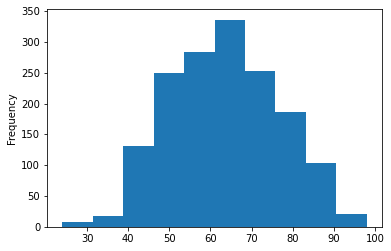

In [136]:
df.age.plot.hist()

## 11) Make a scatterplot of net worth compared to age

<AxesSubplot:xlabel='age', ylabel='networthusbillion'>

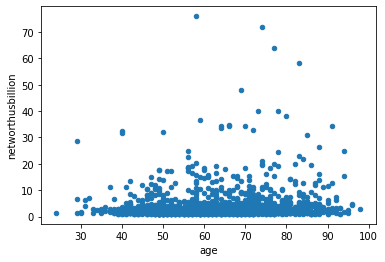

In [141]:
df.plot.scatter(y = 'networthusbillion', x = 'age')

## 13) Make a bar graph of the wealth of the top 10 richest billionaires

> **TIP:** When you make your plot, you'll need to set the `x` and `y` or else your chart will look _crazy_
>
> **TIP:** x and y might be the opposite of what you expect them to be

In [151]:
df_top10 = df.sort_values(by = 'networthusbillion', ascending = False).head(10)

<AxesSubplot:xlabel='name'>

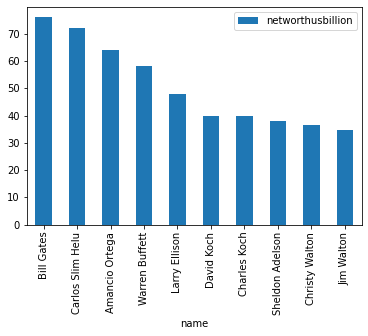

In [157]:
df_top10.plot.bar(x = 'name', y = 'networthusbillion')